# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis
# H_0: There is no significant increase in response rate between customers receiving new template vs. customers receiving 
# current template

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
# H_1: There is a significant increase in response rate between customers receiving new template vs. customers receiving 
# current template

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
power_analysis = TTestIndPower()

In [2]:
# Calculate the required sample size
std = 0.0475
alpha = 0.05
effect_size = 0.01
power = 0.8
nrmlzd_effect_size = effect_size / std

power_analysis.solve_power(alpha=alpha, 
                           effect_size=nrmlzd_effect_size,
                           power=power,
                           alternative='larger')

279.6667468021971

In [3]:
# --> In order to detect a change of 1% in response rate as a significant increase, we'll need a sample size of 
# approximately 280.

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

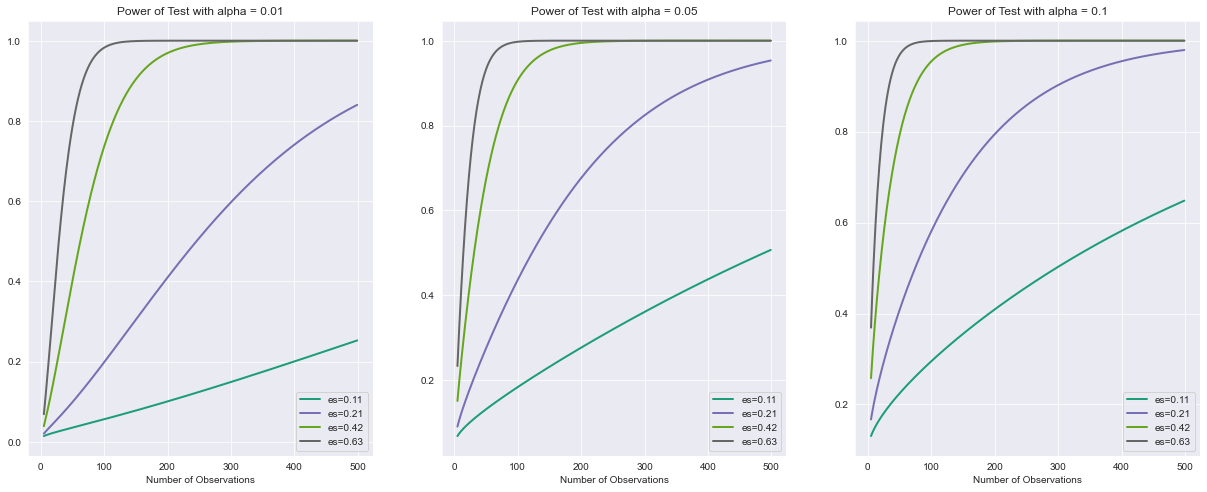

In [12]:
#Your code; plot power curves for the various alpha and effect size combinations
std = 0.0475
alpha_set = [0.01, 0.05, 0.1]

# normalize effect size
effect_set = np.array([0.005, 0.01, 0.02, 0.03])/std
samp_sizes = np.array(range(5, 500))

sns.set_style('darkgrid')
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(21,8))

# Iterate through alpha_set
for idx,alpha in enumerate(alpha_set):
    ax = axes[idx]
    # Use .plot_power() to plot power for various effect sizes
    power_analysis.plot_power(dep_var='nobs',
                              nobs=samp_sizes,
                              alpha=alpha,
                              effect_size=effect_set,
                              alternative='larger',
                              ax=ax)
    # Set title to include alpha value
    ax.set(title=f'Power of Test with alpha = {alpha}')
plt.show();

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

1. Metrics to be used in the test:
- **response? 1/0** (1=Yes, 0=No) - final result expressed in percentage

    `response_rate = yes_count / len(data)`

2. Formulate Null & Alternative Hypotheses:
- **Null Hypothesis**: There is no significant increase in response rate between customers receiving new template vs. customers receiving current template
`H_0: response_rate_new ≤ response_rate_current`

- **Alternative Hypothesis**: There is a significant increase in response rate between customers receiving new template vs. customers receiving current template
`H_0: response_rate_new > response_rate_current`

3. Estimating **sample size** needed for the test:

    Assuming alpha = 0.05, and power = 0.80, we will need **280** observations in the test group to be sure that 1% increase in response rate is statistically significant. (1% difference in response rate after being normalized is 0.2105, which corresponds with the purple line in the plot above).

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.